In [20]:
# we will store our data as a pandas dataset
import pandas as pd

# we will use mat plot for some sexy graphs
import matplotlib.pyplot as plt
%matplotlib inline

# we use numpy for maths and general good stuff 
import numpy as np
import scipy as sc
from time import process_time

In [2]:
#Reading in the data and dropping empty values

df = pd.read_csv(r"./winequalityN.csv")

#Drop any empty values
df.dropna(inplace = True)

#We want to partition the data by wine type 
df_grouped = df.groupby(df.type)
#Creating a seperate dataframe for red and white wine
RED_DF = df_grouped.get_group("red")
WHITE_DF = df_grouped.get_group("white")

In [130]:
WHITE_DF

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,white,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
def derived_rep(dframe,size,state):
    """
    Function that pairs a sample against each other through concatenation. It takes a sample size from a
    data frame and then pairs them with all the other entries within the sample size creating a derived 
    representation. Each row in the outputted data frame is the concatanation of two wine samples.
    
    """
    df_sample = dframe.sample(n=size,random_state=state) #We want to extract a random n number of entries from the data frame
    df_sample = df_sample.drop(columns=['type']) #We want to remove the 'type' column since our data frame is already partitioned into white and red
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    
    for entry1 in range(len(df_sample)):
        for entry2 in range(entry1):
            df1 = df1.append(df_sample.iloc[entry1].to_dict(),ignore_index=True)
            df2 = df2.append(df_sample.iloc[entry2].to_dict(),ignore_index=True)
            
    new_df = df1.join(df2,lsuffix='_1',rsuffix='_2')
    
    return new_df
            

In [4]:
white_concat = derived_rep(WHITE_DF,141,1)

In [5]:
red_concat = derived_rep(RED_DF,141,1)

In [6]:
#Feature mapping
def feature_mapping(dframe):
    """
    This function is the feature mapping for the derived representation. It takes the difference between each
    pair of wines and returns the difference between them. Hence we have a feature mapping that takes both 
    raw inputs for items i and j and produces a single feature vector representing the pair of inputs.
    
    We then create the targets using the wine quality, If wine 1's quality is better than wine 2 then we assign
    a 1, if the quality is not greater then we assign it a 0.
    
    """
    fm_dframe = pd.DataFrame()
    fm_dframe['alcohol_diff'] = dframe.apply(lambda x: x['alcohol_1'] - x['alcohol_2'], axis=1)
    fm_dframe['chlorides_diff'] = dframe.apply(lambda x: x['chlorides_1'] - x['chlorides_2'], axis=1)
    fm_dframe['citric acid_diff'] = dframe.apply(lambda x: x['citric acid_1'] - x['citric acid_2'], axis=1)
    fm_dframe['density_diff'] = dframe.apply(lambda x: x['density_1'] - x['density_2'], axis=1)
    fm_dframe['fixed acidity_diff'] = dframe.apply(lambda x: x['fixed acidity_1'] - x['fixed acidity_2'], axis=1)
    fm_dframe['free sulfur dioxide_diff'] = dframe.apply(lambda x: x['free sulfur dioxide_1'] - x['free sulfur dioxide_2'], axis=1)

    fm_dframe['pH_diff'] = dframe.apply(lambda x: x['pH_1'] - x['pH_2'], axis=1)
    fm_dframe['residual sugar_diff'] = dframe.apply(lambda x: x['residual sugar_1'] - x['residual sugar_2'], axis=1)
    fm_dframe['sulphates_diff'] = dframe.apply(lambda x: x['sulphates_1'] - x['sulphates_2'], axis=1)
    fm_dframe['total sulfur dioxide_diff'] = dframe.apply(lambda x: x['total sulfur dioxide_1'] - x['total sulfur dioxide_2'], axis=1)
    fm_dframe['volatile acidity_diff'] = dframe.apply(lambda x: x['volatile acidity_1'] - x['volatile acidity_2'], axis=1)
    fm_dframe['quality_diff'] = dframe.apply(lambda x: x['quality_1'] - x['quality_2'], axis=1)
    
    
    fm_dframe["Target"] = (fm_dframe["quality_diff"] >= 0).astype(int)
    fm_dframe = fm_dframe.drop(columns=['quality_diff'])
    
    return fm_dframe
    

In [7]:
FM_WHITE = feature_mapping(white_concat)
#FM_WHITE.to_csv(r'FM_WHITE.csv',index=False)

In [8]:
FM_RED = feature_mapping(red_concat)
#FM_RED.to_csv(r'FM_RED.csv',index=False)

In [203]:
FM_RED

,alcohol_diff,chlorides_diff,citric acid_diff,density_diff,fixed acidity_diff,free sulfur dioxide_diff,pH_diff,residual sugar_diff,sulphates_diff,total sulfur dioxide_diff,volatile acidity_diff,Target
0,-0.8,-0.006,-0.36,0.00150,0.6,9.0,-0.23,1.0,-0.13,30.0,0.205,1
1,-0.5,-0.001,-0.60,-0.00213,-2.8,4.0,-0.08,0.0,-0.19,-16.0,0.090,1
2,0.3,0.005,-0.24,-0.00363,-3.4,-5.0,0.15,-1.0,-0.06,-46.0,-0.115,1
3,0.1,-0.027,-0.59,-0.00364,-2.8,0.0,-0.02,-0.3,0.12,-25.0,0.230,1
4,0.9,-0.021,-0.23,-0.00514,-3.4,-9.0,0.21,-1.3,0.25,-55.0,0.025,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9865,-0.2,-0.084,-0.34,-0.00256,-4.8,-2.0,0.03,0.1,-0.19,2.0,0.120,1
9866,-3.2,0.021,-0.08,0.00340,1.7,18.0,-0.05,-0.4,-0.20,-48.0,0.080,0
9867,0.2,-0.020,-0.31,-0.00240,-3.1,23.0,0.20,-0.6,0.17,-8.0,0.240,1
9868,-1.8,-0.009,0.10,0.00201,0.5,8.0,-0.10,-1.2,0.07,1.0,-0.170,0


In [246]:
FM_WHITE

,alcohol_diff,chlorides_diff,citric acid_diff,density_diff,fixed acidity_diff,free sulfur dioxide_diff,pH_diff,residual sugar_diff,sulphates_diff,total sulfur dioxide_diff,volatile acidity_diff,Target
0,-2.2,0.003,0.02,0.00816,1.6,4.0,-0.26,13.5,0.02,92.0,-0.07,0
1,-0.4,-0.007,0.01,0.00226,0.5,-27.0,-0.09,4.7,-0.07,-4.0,0.09,1
2,1.8,-0.010,-0.01,-0.00590,-1.1,-31.0,0.17,-8.8,-0.09,-96.0,0.16,1
3,-2.4,0.025,0.07,0.00716,1.6,18.0,-0.35,12.2,0.00,77.0,-0.01,0
4,-0.2,0.022,0.05,-0.00100,0.0,14.0,-0.09,-1.3,-0.02,-15.0,0.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9865,0.0,-0.008,0.11,-0.00290,-0.7,3.0,-0.07,-8.7,-0.01,-4.0,0.04,1
9866,-0.9,-0.016,0.04,-0.00190,-0.8,-1.5,-0.34,-0.3,-0.20,-67.0,-0.01,1
9867,-2.1,-0.004,-0.12,0.00401,-1.3,15.0,0.13,3.3,-0.09,15.0,0.02,1
9868,-1.6,-0.020,0.14,-0.00020,-1.5,11.0,0.11,-3.0,0.01,-11.0,-0.11,1


In [9]:
def accuracy_score(pred_targets,real_targets):
    number_of_targets = len(real_targets)
    score = 0
    
    for i in range(number_of_targets):
        if real_targets[i]==pred_targets[i]:
            score += 1
    accuracy = score/number_of_targets
    return accuracy

In [10]:
from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter

def dframe_train_test_input_target(dffeature,test_frac):
    """
    This function takes in the new data frame with the feature mapping already applied and converts
    this into training and testing inputs with a split given by the test_fraction. The function should
    output the training inputs and targets as well as the testing inputs and targets. 
    
    
    
    """

    
    np.random.seed(1) #Setting a consistent seed 
    featurematrix = dffeature.to_numpy() #Converting the dataframe into a numpy array 
    
    columns = len(list(dffeature.columns))
    
    inputs = featurematrix[:,:(columns-1)] #We split the matrix into inputs 
    targets = featurematrix[:,columns-1] #Take the last column of the matrix as targets 
    
    train_filter,test_filter=train_and_test_filter(len(dffeature),test_frac) #Applying the training and test split for the inputs and targets using our test fraction
    
    train_inputs, train_targets, test_inputs,test_targets = train_and_test_partition(inputs,targets,train_filter,test_filter) 
    
    return train_inputs,train_targets,test_inputs,test_targets #Returning our training and testing inputs and targets
    

In [4]:
FM_WHITE = pd.read_csv("FM_WHITE.csv")
FM_RED = pd.read_csv("FM_RED.csv")

In [11]:
# Function for cross validation on logistic regression
def cross_validation_LR(X, y, cv,lamda=0):
    """
    X = training_validation_inputs
    y = training_validation_targets
    
    """
    np.random.seed(1)
    Xfolds = np.split(X, cv)
    yfolds = np.split(y, cv)
    cross_vals = []
    for fold in range(cv):
        y_test = yfolds[fold]
        X_test = Xfolds[fold]
        
        X_train_temp = Xfolds[:fold]
        X_train_temp.extend(Xfolds[fold+1:])
        X_train = np.vstack(X_train_temp)
        y_train_temp = yfolds[:fold]
        y_train_temp.extend(yfolds[fold+1:])
        y_train = np.hstack(y_train_temp)
        weights = logistic_regression_fit(X_train, y_train,lamda=lamda)
        y_predict = logistic_regression_predict(X_test,weights)
        val_acc = accuracy_score(y_test, y_predict)
        cross_vals.append(val_acc)
    return cross_vals

In [12]:
def evaluate_cv_LR(X, y,lamda=0, output=False):
        
    scores = cross_validation_LR(X, y, cv=5,lamda=lamda)
    avg_cv = np.mean(scores)
    var_cv = np.std(scores)
    if output:
        print(model)
        print("avg cv score is:", avg_cv, "std is:", var_cv)
    return avg_cv, var_cv

In [13]:
#Logistic Regression Lambda parameter tuning cv

from fomlads.model.classification import logistic_regression_fit
from fomlads.model.classification import logistic_regression_predict

def LR_lambda_cv(training_validation_inputs,training_validation_targets,test_inputs,test_targets,wine_type,lambda_list):
    """
    This function finds the best parameter for lambda on logistic regression then runs the found parameters
    on the test data. It takes in a list of lambdas and tests the values provided within the range. 
    It plots a graph for both red and white wine showing the best value of lambda for both partitions. It then runs the model with the
    best parameters on the test data and outputs the precision, recall  f1 score , and accuracy as well as timing the process.
    
    """
    accuracy_list = []
    
    for lam in lambda_list:

        val_acc,var_cv=evaluate_cv_LR(training_validation_inputs,training_validation_targets,lamda=lam)
        accuracy_list.append(val_acc)
    
    score_max = max(accuracy_list)
    lam_max = lambda_list[accuracy_list.index(score_max)]
    
    plt.plot(lambda_list, accuracy_list, label = f'{wine_type}')
    
    plt.plot(lam_max, score_max, 'o', color = 'orange')
    
    plt.xlabel('Lambda')
    plt.xscale("log")
    plt.ylabel('Accuracy')
    plt.title("Logistic regression accuracies on values of lambda on validation data")
    plt.savefig('foo.png', bbox_inches='tight')
    plt.legend()
    print(f'Best parameter(lambda) for logistic regression for {wine_type} on validation data is ' + str(lam_max))
    print(f'Best accuracy score for logistic regression for {wine_type} on validation data is ' + str(score_max))
    print('\nNow running logistic regression on test data with best parameters ...')
    
    LR_test_funct(training_validation_inputs,training_validation_targets,test_inputs,test_targets,wine_type=wine_type,lamda = lam_max)
    

    

In [ ]:
time.process_time

In [23]:
def LR_test_funct(train_val_inputs,train_val_targets,test_inputs,test_targets, wine_type,lamda = 0):
    
    t1_start = process_time()
    
    weight = logistic_regression_fit(train_val_inputs,train_val_targets,lamda = lamda)
    predicted_wine_targets = logistic_regression_predict(test_inputs,weight)
    accuracy = accuracy_score(predicted_wine_targets,test_targets)
    
    t1_stop = process_time()
    
    print("Time taken for model to run on test data in seconds: ",t1_stop-t1_start)
    print(f"\n Classification Report for {wine_type} on test data \n\n")
    classificationreport(test_targets, predicted_wine_targets)
    print(f'\n Confusion matrix for {wine_type} on test data \n\n' + str(confusion_matrix(test_targets,predicted_wine_targets)))




Best parameter(lambda) for logistic regression for white wine on validation data is 0.00046415888336127773
Best accuracy score for logistic regression for white wine on validation data is 0.7157160963244614

Now running logistic regression on test data with best parameters ...
Time taken for model to run on test data in seconds:  5.1037679999999455

 Classification Report for white wine on test data 


Precison is: 0.6687
Recall is: 0.5534
F1_Score is: 0.6056
Accuracy is: 0.7172

 Confusion matrix for white wine on test data 

[[430 347]
 [213 990]]
Best parameter(lambda) for logistic regression for red wine on validation data is 0.01
Best accuracy score for logistic regression for red wine on validation data is 0.7732572877059569

Now running logistic regression on test data with best parameters ...
Time taken for model to run on test data in seconds:  6.479619999999613

 Classification Report for red wine on test data 


Precison is: 0.7271
Recall is: 0.5302
F1_Score is: 0.6132
Accur

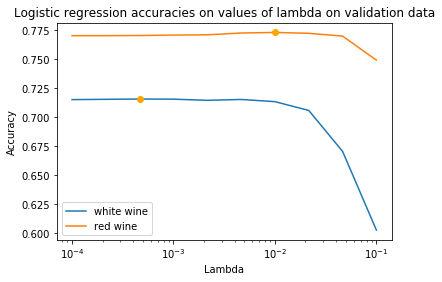

In [24]:
def scalar_funct(inputs):
    """
    This function takes in the input array for both training and testing and standardises all the columns 
    within the array
    
    """
    for i in range(inputs.shape[1]):
        mean_i = np.mean(inputs[:,i])
        std_i = np.std(inputs[:,i])
        inputs[:,i] = (inputs[:,i] - mean_i)/std_i
    return inputs

W_validation_inputs,W_validation_targets,W_test_inputs,W_test_targets = dframe_train_test_input_target(FM_WHITE,0.2)#W stands for white

R_validation_inputs,R_validation_targets,R_test_inputs,R_test_targets = dframe_train_test_input_target(FM_RED,0.2) #R stands for Red


scalar_funct(W_validation_inputs)
scalar_funct(W_test_inputs)
scalar_funct(R_validation_inputs)
scalar_funct(R_test_inputs)

LR_lambda_cv(W_validation_inputs,W_validation_targets,W_test_inputs,W_test_targets,wine_type='white wine',lambda_list = np.logspace(-4,-1,10))
LR_lambda_cv(R_validation_inputs,R_validation_targets,R_test_inputs,R_test_targets,wine_type='red wine',lambda_list = np.logspace(-4,-1,10))

In [16]:
# Confusion Matrix Function 

def confusion_matrix(true_classes,predicted_classes):

    classes = set(true_classes)
    confusionmatrix  = pd.DataFrame(
        np.zeros((2,2),dtype=int),
        index=classes,
        columns=classes)

    for true_label, prediction in zip(true_classes ,predicted_classes):
        confusionmatrix.loc[true_label, prediction] += 1

    return confusionmatrix.values 


In [61]:
print('Confusion matrix for white wine \n\n' + str(confusion_matrix(W_test_targets,W_predicted_wine_targets)))
print('\nConfusion matrix for red wine \n\n' + str(confusion_matrix(R_test_targets,R_predicted_wine_targets)))

Confusion matrix for white wine 

[[ 409  368]
 [ 180 1023]]

Confusion matrix for red wine 

[[ 321  292]
 [ 120 1247]]


In [17]:
# Function for classification Report 
def classificationreport(true_classes,predicted_classes):
    cm = confusion_matrix(true_classes,predicted_classes)
    recall = cm[0,0]/(cm[0,0]+cm[0,1])
    precision = cm[0,0]/(cm[0,0]+cm[1,0])
    f1_score = 2*precision*recall / (precision+recall)
    acc = np.sum(np.equal(true_classes, predicted_classes)) / len(true_classes)
   
    print('Precison is: {0:0.4f}'. format(precision))
    print('Recall is: {0:0.4f}'. format(recall))
    print('F1_Score is: {0:0.4f}'. format(f1_score))
    print('Accuracy is: {0:0.4f}'. format(acc))

print("Classification Report for white wine\n\n")
#classificationreport(W_test_targets, W_predicted_wine_targets)

print("\nClassification Report for red wine\n\n")
#classificationreport(R_test_targets, R_predicted_wine_targets)

Classification Report for white wine



Classification Report for red wine


